<a href="https://colab.research.google.com/github/MahdieRah/Protein_Feature_Extraction/blob/main/Protein_visualization_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload a PDB file
from google.colab import files
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Upload PDB file
uploaded = files.upload()

Saving 3p8c.pdb to 3p8c.pdb


In [3]:
# Get the PDB file name
pdb_filename = list(uploaded.keys())[0]
print(f"Uploaded file: {pdb_filename}")

Uploaded file: 3p8c.pdb


In [4]:
# Parse the PDB file
def parse_pdb(file_path):
    atoms = []
    with open(file_path, 'r') as pdb_file:
        for line in pdb_file:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                atom_name = line[12:16].strip()
                residue_name = line[17:20].strip()
                chain_id = line[21].strip()
                residue_number = int(line[22:26].strip())
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                atoms.append((atom_name, residue_name, chain_id, residue_number, x, y, z))
    return atoms


In [5]:
# Parse the uploaded PDB file
atoms = parse_pdb(pdb_filename)

print(f"Total atoms parsed: {len(atoms)}")
print("Sample atoms:", atoms[:5])


Total atoms parsed: 23017
Sample atoms: [('N', 'VAL', 'A', 5, 61.536, 58.801, 238.627), ('CA', 'VAL', 'A', 5, 61.274, 59.512, 239.92), ('C', 'VAL', 'A', 5, 60.509, 60.827, 239.694), ('O', 'VAL', 'A', 5, 61.062, 61.811, 239.2), ('CB', 'VAL', 'A', 5, 62.586, 59.71, 240.757)]


In [6]:
# Extract 3D coordinates
coords = np.array([[atom[4], atom[5], atom[6]] for atom in atoms])

In [18]:
# Apply 3D manipulations
# (a) Translation
translation_vector = np.array([5.0, -3.0, 2.0])
translated_coords = coords + translation_vector
# (b) Rotation: Choose axis (x, y, z) and angle
def rotation_matrix(axis, angle):
    angle = np.radians(angle)
    if axis == 'x':
        return np.array([
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle), np.cos(angle)]
        ])
    elif axis == 'y':
        return np.array([
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)]
        ])
    elif axis == 'z':
        return np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'z'.")


In [19]:
# Customize rotation
chosen_axis = 'y'  # Choose 'x', 'y', or 'z'
rotation_angle = 60  # Set the angle in degrees
rotated_coords = translated_coords @ rotation_matrix(chosen_axis, rotation_angle).T


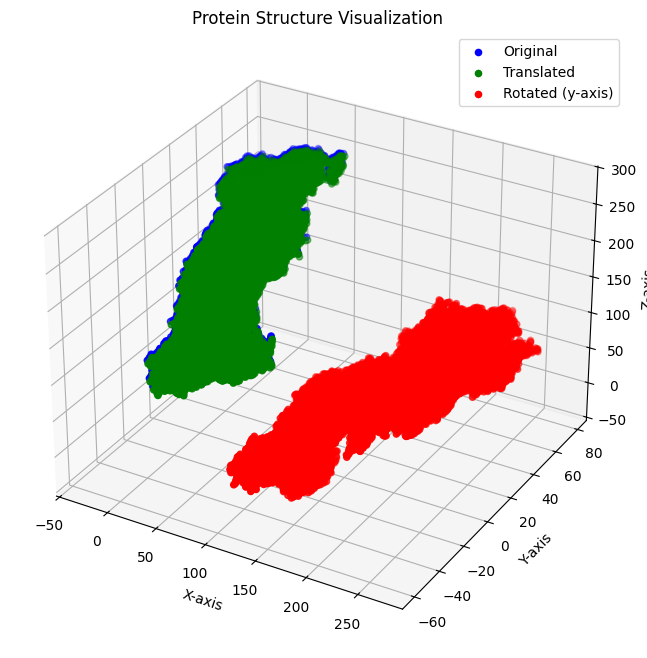

In [22]:
# Visualize the 3D Structure
def visualize_structure(original, translated, rotated):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot original structure
    ax.scatter(original[:, 0], original[:, 1], original[:, 2], c='blue', label='Original')

    # Plot translated structure
    ax.scatter(translated[:, 0], translated[:, 1], translated[:, 2], c='green', label='Translated')

    # Plot rotated structure
    ax.scatter(rotated[:, 0], rotated[:, 1], rotated[:, 2], c='red', label=f'Rotated ({chosen_axis}-axis)')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Protein Structure Visualization')
    ax.legend()
    plt.show()

visualize_structure(coords, translated_coords, rotated_coords)

In [23]:
# Advanced Analysis
# (a) Compute pairwise distances
def compute_distances(coords):
    num_atoms = coords.shape[0]
    distances = np.zeros((num_atoms, num_atoms))
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            dist = np.linalg.norm(coords[i] - coords[j])
            distances[i, j] = distances[j, i] = dist
    return distances

pairwise_distances = compute_distances(coords)

print("\nPairwise Distance Matrix (first 5 rows and columns):")
print(pairwise_distances[:5, :5])




Pairwise Distance Matrix (first 5 rows and columns):
[[0.         1.49867074 2.50956052 3.10050077 2.54277034]
 [1.49867074 0.         1.53802666 2.41841787 1.56879476]
 [2.50956052 1.53802666 0.         1.23211241 2.5868102 ]
 [3.10050077 2.41841787 1.23211241 0.         3.02671869]
 [2.54277034 1.56879476 2.5868102  3.02671869 0.        ]]


In [24]:
# (b) Calculate angles between three atoms
def calculate_angle(a, b, c):
    ba = a - b
    bc = c - b
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))

if len(coords) >= 3:
    angle = calculate_angle(coords[0], coords[1], coords[2])
    print(f"\nAngle between atom 1, 2, and 3: {angle:.2f} degrees")



Angle between atom 1, 2, and 3: 111.46 degrees


In [25]:
# Output transformations
print("\nOriginal Coordinates (First 5 Atoms):")
print(coords[:5])

print("\nTranslated Coordinates (First 5 Atoms):")
print(translated_coords[:5])

print("\nRotated Coordinates (First 5 Atoms):")
print(rotated_coords[:5])



Original Coordinates (First 5 Atoms):
[[ 61.536  58.801 238.627]
 [ 61.274  59.512 239.92 ]
 [ 60.509  60.827 239.694]
 [ 61.062  61.811 239.2  ]
 [ 62.586  59.71  240.757]]

Translated Coordinates (First 5 Atoms):
[[ 66.536  55.801 240.627]
 [ 66.274  56.512 241.92 ]
 [ 65.509  57.827 241.694]
 [ 66.062  58.811 241.2  ]
 [ 67.586  56.71  242.757]]

Rotated Coordinates (First 5 Atoms):
[[241.65709484  55.801       62.69163373]
 [242.64586568  56.512       63.56503239]
 [242.06764394  57.827       64.11454182]
 [241.91632739  58.811       63.38862978]
 [244.02672895  56.71        62.84730706]]


In [ ]:
n

Rotate Around an Arbitrary Axis & RMSD Calculation

In [2]:
# Upload a PDB file in Google Colab
from google.colab import files
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Upload PDB file
uploaded = files.upload()

Saving 3p8c.pdb to 3p8c.pdb


In [4]:
# Get the PDB file name
pdb_filename = list(uploaded.keys())[0]
print(f"Uploaded file: {pdb_filename}")

Uploaded file: 3p8c.pdb


In [5]:
# Parse the PDB file
def parse_pdb(file_path):
    atoms = []
    with open(file_path, 'r') as pdb_file:
        for line in pdb_file:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                atom_name = line[12:16].strip()
                residue_name = line[17:20].strip()
                chain_id = line[21].strip()
                residue_number = int(line[22:26].strip())
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                atoms.append((atom_name, residue_name, chain_id, residue_number, x, y, z))
    return atoms

In [6]:
# Parse the uploaded PDB file
atoms = parse_pdb(pdb_filename)

print(f"Total atoms parsed: {len(atoms)}")
print("Sample atoms:", atoms[:5])


Total atoms parsed: 23017
Sample atoms: [('N', 'VAL', 'A', 5, 61.536, 58.801, 238.627), ('CA', 'VAL', 'A', 5, 61.274, 59.512, 239.92), ('C', 'VAL', 'A', 5, 60.509, 60.827, 239.694), ('O', 'VAL', 'A', 5, 61.062, 61.811, 239.2), ('CB', 'VAL', 'A', 5, 62.586, 59.71, 240.757)]


In [7]:
# Extract 3D coordinates
coords = np.array([[atom[4], atom[5], atom[6]] for atom in atoms])

In [8]:
# Apply 3D manipulations
# (a) Translation
translation_vector = np.array([5.0, -3.0, 2.0])
translated_coords = coords + translation_vector

# (b) Rotation around an arbitrary axis using Rodrigues' rotation formula
def rotate_around_axis(coords, axis, angle):
    axis = axis / np.linalg.norm(axis)  # Normalize axis
    angle = np.radians(angle)

    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)

    # Rodrigues' rotation formula
    rotation_matrix = cos_theta * np.eye(3) + sin_theta * np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ]) + (1 - cos_theta) * np.outer(axis, axis)

    return coords @ rotation_matrix.T


In [9]:
# Customize rotation
arbitrary_axis = np.array([1, 1, 0])  # Arbitrary axis
rotation_angle = 45  # Rotation angle in degrees
rotated_coords = rotate_around_axis(translated_coords, arbitrary_axis, rotation_angle)

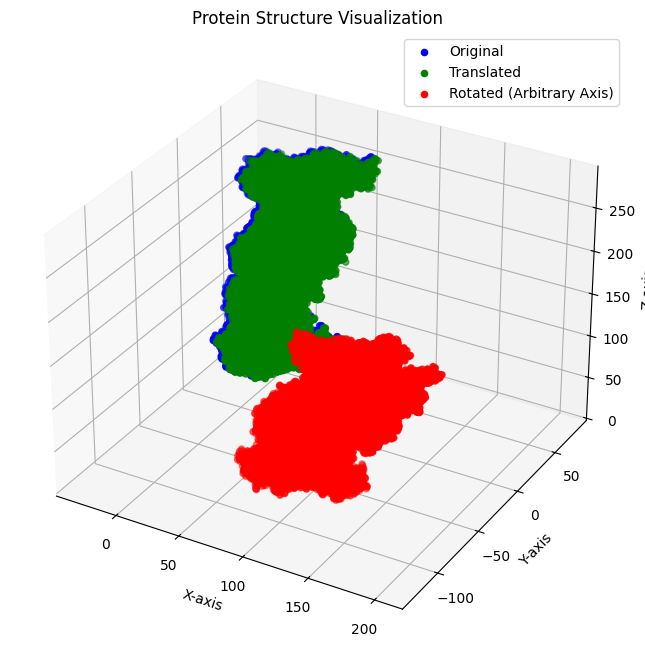

In [10]:
# Visualize the 3D Structure
def visualize_structure(original, translated, rotated):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot original structure
    ax.scatter(original[:, 0], original[:, 1], original[:, 2], c='blue', label='Original')

    # Plot translated structure
    ax.scatter(translated[:, 0], translated[:, 1], translated[:, 2], c='green', label='Translated')

    # Plot rotated structure
    ax.scatter(rotated[:, 0], rotated[:, 1], rotated[:, 2], c='red', label='Rotated (Arbitrary Axis)')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Protein Structure Visualization')
    ax.legend()
    plt.show()

visualize_structure(coords, translated_coords, rotated_coords)


In [11]:
# Torsion Angle Calculation
def calculate_torsion_angle(p1, p2, p3, p4):
    b1 = p2 - p1
    b2 = p3 - p2
    b3 = p4 - p3

    n1 = np.cross(b1, b2)
    n2 = np.cross(b2, b3)

    n1 /= np.linalg.norm(n1)
    n2 /= np.linalg.norm(n2)

    m1 = np.cross(n1, b2 / np.linalg.norm(b2))

    x = np.dot(n1, n2)
    y = np.dot(m1, n2)

    return np.degrees(np.arctan2(y, x))


In [12]:
# Example: Calculate torsion angle if we have 4 atoms
if len(coords) >= 4:
    torsion_angle = calculate_torsion_angle(coords[0], coords[1], coords[2], coords[3])
    print(f"\nTorsion Angle (Dihedral) between first 4 atoms: {torsion_angle:.2f} degrees")



Torsion Angle (Dihedral) between first 4 atoms: 72.81 degrees


In [13]:
# RMSD Calculation
def calculate_rmsd(coords1, coords2):
    return np.sqrt(np.mean(np.sum((coords1 - coords2) ** 2, axis=1)))

In [14]:
# Example: Calculate RMSD between original and rotated structures
rmsd_value = calculate_rmsd(coords, rotated_coords)
print(f"\nRMSD between original and rotated structure: {rmsd_value:.4f} Å")



RMSD between original and rotated structure: 152.0364 Å
